In [7]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler




In [2]:
# ML Model Setup

# Relevant Variables: 

#    1. Volatile acidity
#    2. Chlorides
#    3. Free sulfur dioxide
#    4. Alcohol
#    5. Residaul Sugar

# Models:
# 1. KNN - Nearest Neighbor Algorithms

# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Standard scaler

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Label RED Pred
# 4. Label White Pred



In [3]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [4]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white


In [8]:
# Model: KNN R/W

X = wines.iloc[:, lambda df: [1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_rw_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))
print(pred_wines_rw_neigh.shape)
print(y_test.shape)
print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_neigh))
print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))



Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.95      0.97      0.96       160
       white       0.99      0.98      0.99       490

    accuracy                           0.98       650
   macro avg       0.97      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650

[[156   4]
 [  8 482]]
Cohen-Kappa score:  0.9506703769289148
Training accuracy: 0.9728
Testing accuracy: 0.9815


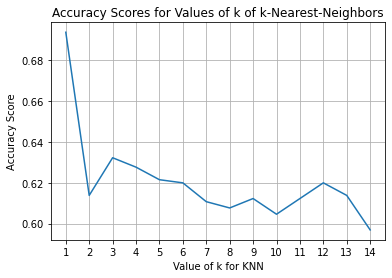

0.563076923076923


In [28]:
# Model: KNN Label

X = wines.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


In [29]:
# Model: KNN Label Results

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.67      0.64      0.65       128
         low       0.72      0.74      0.73       238
      medium       0.68      0.68      0.68       284

    accuracy                           0.69       650
   macro avg       0.69      0.69      0.69       650
weighted avg       0.69      0.69      0.69       650

[[ 82  12  34]
 [  7 176  55]
 [ 34  57 193]]
Cohen-Kappa score:  0.5179946191281795
Training accuracy: 0.9997
Testing accuracy: 0.6938


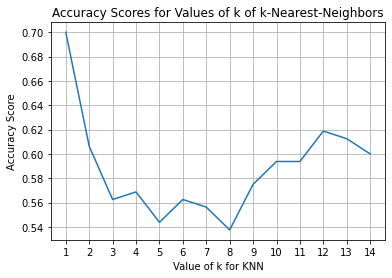

0.5875


In [38]:
# Model: KNN Label RED

X = red_df.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


In [39]:
# Model: KNN Label RED Results

knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_red_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.55      0.50      0.52        22
         low       0.78      0.82      0.80        74
      medium       0.65      0.62      0.63        64

    accuracy                           0.70       160
   macro avg       0.66      0.65      0.65       160
weighted avg       0.70      0.70      0.70       160

[[11  2  9]
 [ 0 61 13]
 [ 9 15 40]]
Cohen-Kappa score:  0.5019455252918288
Training accuracy: 1.0000
Testing accuracy: 0.7000


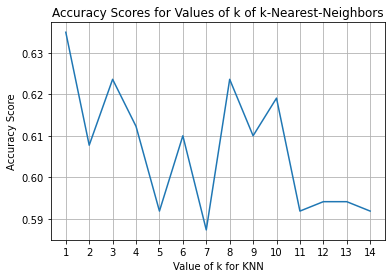

0.562358276643991


In [46]:
# Model: KNN Label White

X = white_df.iloc[:, lambda df:[1, 3, 4, 5, 10]]
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42, stratify=white_df.quality_label)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# experimenting with different n values
k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xticks(k_range)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [50]:
# Model: KNN Label White Results

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_white_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'medium': 2000, 'low': 1492, 'high': 965}) Counter({'medium': 198, 'low': 148, 'high': 95})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(441,)
(441,)
              precision    recall  f1-score   support

        high       0.53      0.56      0.54        95
         low       0.68      0.72      0.70       148
      medium       0.62      0.58      0.60       198

    accuracy                           0.62       441
   macro avg       0.61      0.62      0.62       441
weighted avg       0.62      0.62      0.62       441

[[ 53   7  35]
 [  7 107  34]
 [ 40  43 115]]
Cohen-Kappa score:  0.4158147997414474
Training accuracy: 0.6774
Testing accuracy: 0.6236


In [ ]:
#%reset